# PCA - IRIS DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.copy()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X.iloc[:, :-1])
scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [6]:
# Applying PCA on the data

from sklearn.decomposition import PCA

pca = PCA(random_state = 42)
pca.fit(scaled)
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [7]:
evr = pca.explained_variance_ratio_
evr

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

<BarContainer object of 4 artists>

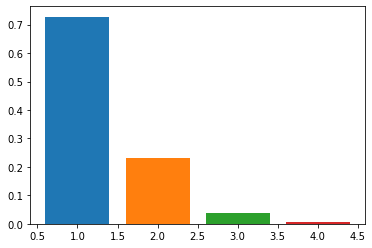

In [8]:
# Plotting
plt.bar(range(1, len(evr)+1), evr, color = ['C0', 'C1', 'C2', 'C3'])

In [9]:
# Cumulative Sum
var_cumsum = np.cumsum(evr)
var_cumsum

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

### Making Scree Plot

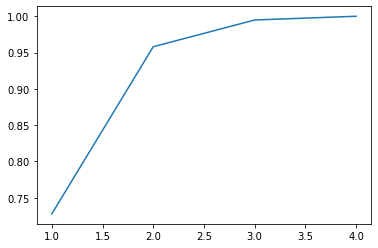

In [10]:
plt.plot(range(1, len(var_cumsum)+1), var_cumsum)

In [11]:
# PCA with 2 components
pca2 = PCA(n_components = 2, random_state = 42)
new_data = pca2.fit_transform(scaled)
new_data.shape

(150, 2)

In [12]:
# Making a DataFrame for convenience
df = pd.DataFrame(new_data, columns = ['PCA1', 'PCA2'])
df.head()

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [13]:
y = data.pop('iris')
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object

In [14]:
df_final = pd.concat([df, y], axis = 1)
df_final.head()

,PCA1,PCA2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


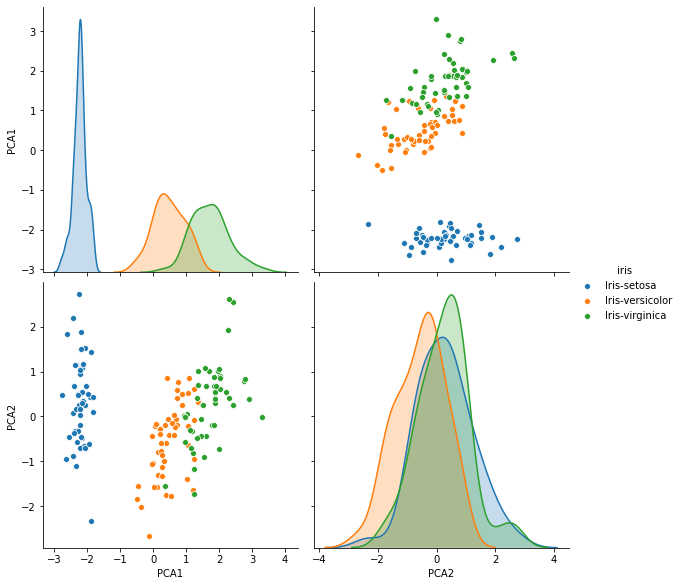

In [17]:
# Plotting final data
sns.pairplot(df_final, hue = 'iris', size = 4)
plt.show()

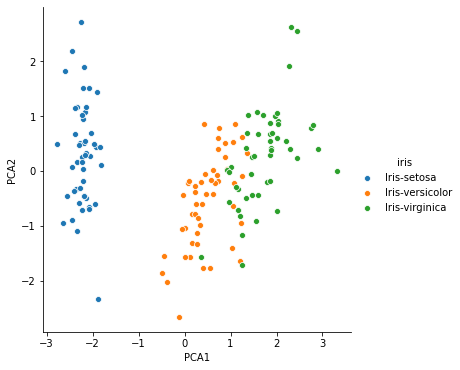

In [16]:
sns.pairplot(data=df_final, x_vars=["PCA1"], y_vars=["PCA2"], hue = "iris", size=5)
plt.show()